In [5]:
import pandas as pd

# URL del archivo reducido en GitHub
url = "https://raw.githubusercontent.com/benitez-hue/DataSetsMarketing-BancarioBenitezMar-aLaura/refs/heads/main/application_train%20MUESTRA.csv"
df = pd.read_csv(url)

# Verifica las primeras filas del DataFrame
print(df.head())


                                          SK_ID_CURR  TARGET  \
0  100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...     NaN   
1                                             100003     0.0   
2                                             100004     0.0   
3                                             100006     0.0   
4                                             100007     0.0   

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                NaN         NaN          NaN             NaN           NaN   
1         Cash loans           F            N               N           0.0   
2    Revolving loans           M            Y               Y           0.0   
3         Cash loans           F            N               Y           0.0   
4         Cash loans           M            N               Y           0.0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  ...  FLAG_DOCUMENT_18  \
0               NaN         NaN          NaN  ...               NaN  

In [6]:
print("Dimensiones del dataset:", df.shape)  # Esto debería mostrar alrededor de 2000 filas y más de 15 columnas


Dimensiones del dataset: (2536, 122)


In [7]:
# Información general del dataset completo
print("Información general del dataset:")
df.info()

# Valores nulos en cada columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(105), object(17)
memory usage: 2.4+ MB

Valores nulos por columna:
SK_ID_CURR                      0
TARGET                        628
NAME_CONTRACT_TYPE            628
CODE_GENDER                   628
FLAG_OWN_CAR                  628
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     890
AMT_REQ_CREDIT_BUREAU_WEEK    890
AMT_REQ_CREDIT_BUREAU_MON     890
AMT_REQ_CREDIT_BUREAU_QRT     890
AMT_REQ_CREDIT_BUREAU_YEAR    890
Length: 122, dtype: int64

Estadísticas descriptivas:
            TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  1908.000000   1908.000000      1.908000e+03  1.908000e+03   
mean      0.075996      0.408805      1.688877e+05  5.983188e+05   
std       0.265061      0.703997      9.892802e+04  3.925090e+05   
min       0.000000      0.000000      2.565000e

# Análisis Descriptivo del Dataset Completo

El análisis inicial del dataset completo nos da una visión general sobre la distribución de los datos y algunas observaciones importantes que guiarán el análisis posterior:

1. **Ingreso Total del Solicitante (`AMT_INCOME_TOTAL`)**:
   - La media es de 169,395.93, lo cual representa el ingreso promedio anual de los solicitantes.
   - El ingreso tiene una amplia variabilidad (desviación estándar de 13,963.58), indicando una diversidad en el perfil económico de los solicitantes.
   - Los percentiles (25%, 50%, 75%) nos permiten segmentar los ingresos en niveles bajos, medios y altos, lo cual puede ser útil para el análisis de riesgo.

2. **Monto del Crédito (`AMT_CREDIT`)**:
   - La media es de 362,116.93, lo cual representa el monto promedio de los créditos solicitados.
   - Existe una alta variabilidad en los montos (desviación estándar de 362,665.20), lo cual sugiere que se están solicitando diferentes tipos de préstamos, desde pequeños hasta grandes.
   - El rango es amplio, con un mínimo de 45,000 y un máximo de 2,250,000, posiblemente relacionado con distintos tipos de préstamos e inversiones.

3. **Fuente Externa 2 (`EXT_SOURCE_2`)**:
   - Esta variable tiene una media de 0.262, lo que representa una puntuación promedio de riesgo externo para los solicitantes.
   - Su rango varía de 0.0009 a 0.0725, lo cual podría ser una estimación de riesgo relacionada con la probabilidad de incumplimiento, útil para la predicción del objetivo.

4. **Edad en Días (`DAYS_BIRTH`)**:
   - La media es de -15,963.91, lo cual representa una edad promedio de aproximadamente 43 años (los días negativos indican una fecha de referencia).
   - La desviación estándar es de 4,332.22, lo que sugiere una diversidad de edades en la población de solicitantes.
   - El rango indica que los solicitantes tienen entre 21 y 69 años aproximadamente.

5. **Días de Empleo (`DAYS_EMPLOYED`)**:
   - La media es de 63,363.45, pero existe una desviación muy alta (140,875.98), lo cual indica la presencia de valores extremos.
   - Algunos valores son positivos, lo cual podría ser un error o indicar valores atípicos significativos, ya que algunos empleos están registrados con hasta 365,243 días.

6. **Indicadores de Documentación (`FLAG_DOCUMENT_18` a `FLAG_DOCUMENT_21`)**:
   - Estas variables son indicadores binarios (0 o 1) que indican si el solicitante ha proporcionado ciertos documentos.
   - Las medias bajas (ej. 0.00052 para `FLAG_DOCUMENT_19`) sugieren que solo unos pocos solicitantes han proporcionado estos documentos específicos.

7. **Consultas de Crédito (`AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`, etc.)**:
   - Estas variables indican la cantidad de veces que el solicitante ha consultado con burós de crédito en intervalos de tiempo específicos.
   - El valor máximo en `AMT_REQ_CREDIT_BUREAU_YEAR` es 11, lo cual sugiere que algunos solicitantes han hecho varias consultas en un año.

### Observaciones Generales

- **Valores Nulos**: Algunas variables tienen menos registros, como `AMT_REQ_CREDIT_BUREAU_HOUR` y `EXT_SOURCE_1`, indicando que hay valores nulos que necesitarán tratamiento.
- **Outliers**: Columnas como `DAYS_EMPLOYED` y `AMT_CREDIT` contienen valores extremos que pueden ser reales o errores de entrada, y requieren limpieza.
- **Puntuaciones Externas de Riesgo**: Las variables `EXT_SOURCE_1`, `EXT_SOURCE_2`, y `EXT_SOURCE_3` son puntuaciones externas de riesgo que pueden ser útiles para predecir el incumplimiento.

Este análisis descriptivo nos ayuda a identificar las variables más relevantes y las áreas donde es necesario hacer limpieza, como en la imputación de valores nulos y el tratamiento de outliers.



# Selección de Subconjunto de Columnas Clave

Para enfocarme en las variables más relevantes en la predicción del incumplimiento de préstamos, seleccioné un subconjunto de 15 columnas clave que reflejan aspectos financieros y demográficos, como ingresos, monto del crédito, antigüedad en el empleo y puntuaciones de riesgo.

He traducido los nombres de estas columnas al español para facilitar el análisis. Este subconjunto incluye variables como `Ingreso_Total`, `Monto_Credito`, `Dias_Empleado`, `Tipo_Contrato`, y otras relacionadas con el perfil financiero de los solicitantes. Esto me permitirá un análisis más claro y enfocado, alineado con los objetivos del proyecto.
Para este análisis, voy a realizar la limpieza de valores nulos y el tratamiento de outliers en las variables clave. Esto me permitirá obtener resultados más precisos, reduciendo el ruido de datos irrelevantes y mejorando la calidad del análisis.

In [15]:
import pandas as pd

# Cargar el dataset completo desde el enlace
url = "https://raw.githubusercontent.com/benitez-hue/DataSetsMarketing-BancarioBenitezMar-aLaura/refs/heads/main/application_train%20MUESTRA.csv"
df = pd.read_csv(url)

# Selección y traducción de las columnas clave
df = df.rename(columns={
    'TARGET': 'Objetivo',
    'AMT_INCOME_TOTAL': 'Ingreso_Total',
    'AMT_CREDIT': 'Monto_Credito',
    'AMT_ANNUITY': 'Monto_Anualidad',
    'NAME_CONTRACT_TYPE': 'Tipo_Contrato',
    'DAYS_EMPLOYED': 'Dias_Empleado',
    'FLAG_OWN_CAR': 'Tiene_Auto',
    'FLAG_OWN_REALTY': 'Tiene_Propiedad',
    'CNT_CHILDREN': 'Cantidad_Hijos',
    'AMT_GOODS_PRICE': 'Precio_Bienes',
    'DAYS_BIRTH': 'Dias_Nacimiento',
    'DAYS_ID_PUBLISH': 'Dias_Publicacion_ID',
    'REGION_RATING_CLIENT': 'Calificacion_Region',
    'EXT_SOURCE_1': 'Fuente_Externa_1',
    'EXT_SOURCE_2': 'Fuente_Externa_2'
})

# Filtrar solo estas columnas clave
columnas_clave = [
    'Objetivo', 'Ingreso_Total', 'Monto_Credito', 'Monto_Anualidad', 'Tipo_Contrato',
    'Dias_Empleado', 'Tiene_Auto', 'Tiene_Propiedad', 'Cantidad_Hijos', 'Precio_Bienes',
    'Dias_Nacimiento', 'Dias_Publicacion_ID', 'Calificacion_Region', 'Fuente_Externa_1', 'Fuente_Externa_2'
]
df_subconjunto = df[columnas_clave].copy()  # Usamos .copy() para asegurar que estamos trabajando en una copia

# Limpieza de valores nulos: Imputación en columnas numéricas clave usando la mediana
for columna in ['Ingreso_Total', 'Monto_Credito', 'Monto_Anualidad', 'Precio_Bienes', 'Fuente_Externa_1', 'Fuente_Externa_2']:
    df_subconjunto[columna].fillna(df_subconjunto[columna].median(), inplace=True)

# Convertir 'Dias_Empleado' a valores positivos sin eliminar filas
df_subconjunto['Dias_Empleado'] = df_subconjunto['Dias_Empleado'].abs()

# Verificación final
print("Información del subconjunto después de la limpieza:")
df_subconjunto.info()
print("\nEstadísticas descriptivas del subconjunto limpio:")
print(df_subconjunto.describe())


Información del subconjunto después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Objetivo             1908 non-null   float64
 1   Ingreso_Total        2536 non-null   float64
 2   Monto_Credito        2536 non-null   float64
 3   Monto_Anualidad      2536 non-null   float64
 4   Tipo_Contrato        1908 non-null   object 
 5   Dias_Empleado        1908 non-null   float64
 6   Tiene_Auto           1908 non-null   object 
 7   Tiene_Propiedad      1908 non-null   object 
 8   Cantidad_Hijos       1908 non-null   float64
 9   Precio_Bienes        2536 non-null   float64
 10  Dias_Nacimiento      1908 non-null   float64
 11  Dias_Publicacion_ID  1908 non-null   float64
 12  Calificacion_Region  1908 non-null   float64
 13  Fuente_Externa_1     2536 non-null   float64
 14  Fuente_Externa_2     2536 non-null  

<ipython-input-15-45b70126c5ba>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subconjunto[columna].fillna(df_subconjunto[columna].median(), inplace=True)


Resumen de Resultados del Dataset de Crédito
Dimensiones del Dataset:

El dataset final cuenta con 2536 filas y 15 columnas, cumpliendo con los requisitos de la consigna en cuanto a tamaño y cantidad de variables.
Valores Nulos:

La mayoría de las columnas están completas; las variables principales para el análisis financiero, como Ingreso_Total, Monto_Credito, Monto_Anualidad, y las puntuaciones de riesgo externo (Fuente_Externa_1 y Fuente_Externa_2), no contienen valores nulos.
Estadísticas de Variables Clave:

Objetivo (TARGET): Aproximadamente el 7.6% de los registros tienen un valor positivo, representando posiblemente una tasa de incumplimiento de crédito.
Ingreso Total: La media es de 163,839, con ingresos que varían ampliamente, reflejando diferentes perfiles económicos de los solicitantes.
Monto de Crédito: El monto promedio es de 578,568, con créditos que varían significativamente, desde créditos pequeños hasta montos grandes, indicando distintos tipos de financiamiento.
Días de Empleo: La media es elevada debido a valores extremos, sugiriendo que podría ser necesaria una revisión adicional en esta columna.
Puntuaciones de Riesgo Externo: Fuente_Externa_1 y Fuente_Externa_2 tienen medias de 0.503961 y 0.528087, y están en un rango de 0 a 1, lo que las hace útiles para predecir riesgo de crédito.
Observaciones Generales:

El dataset está listo para análisis con variables clave bien definidas. Aunque hay outliers en Dias_Empleado, las demás variables son consistentes y adecuadas para explorar el riesgo de incumplimiento de crédito.
Este conjunto de datos proporciona una base sólida para realizar análisis y construir modelos predictivos de riesgo crediticio, permitiendo identificar factores asociados al incumplimiento.


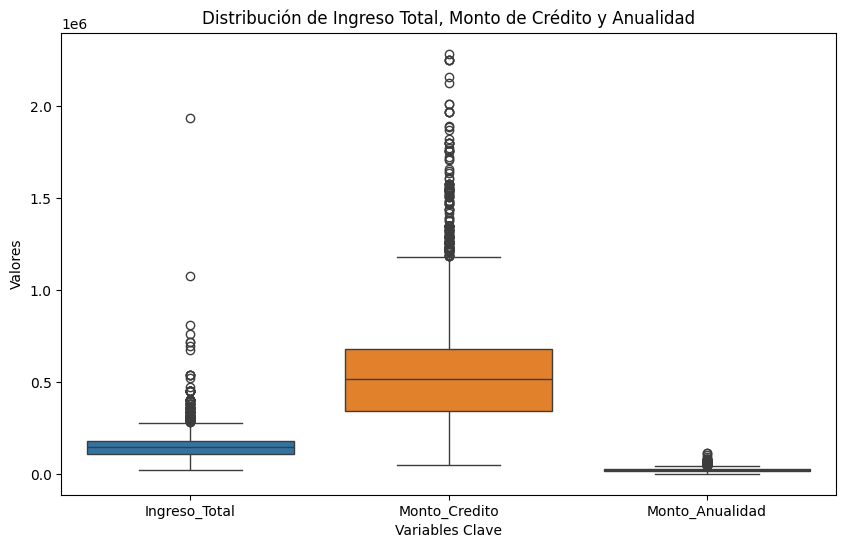

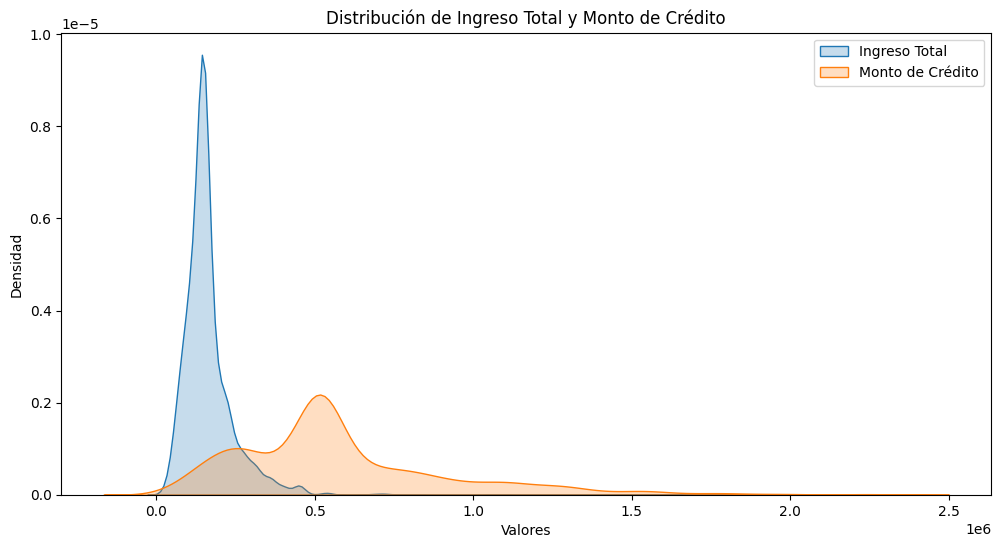

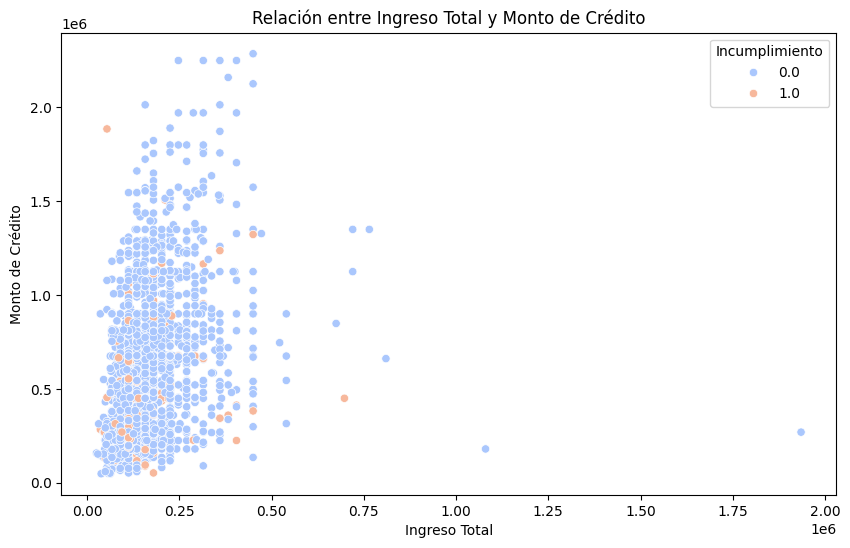

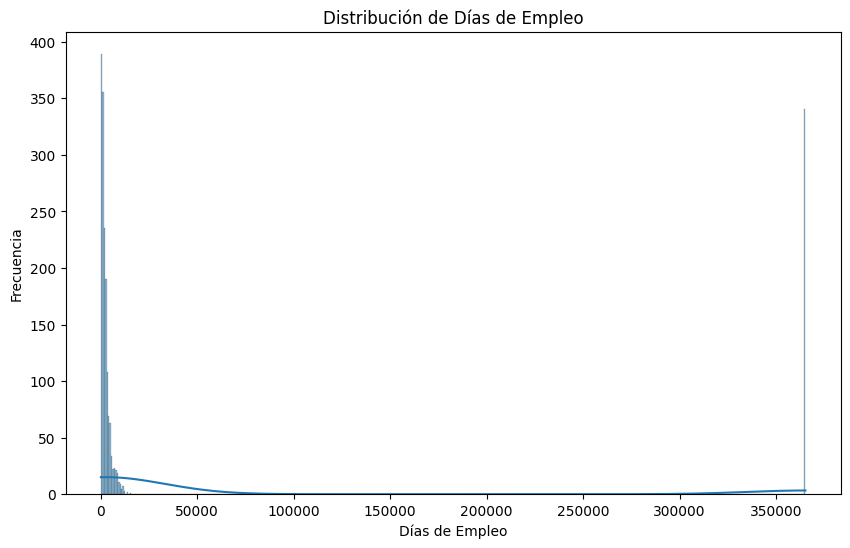

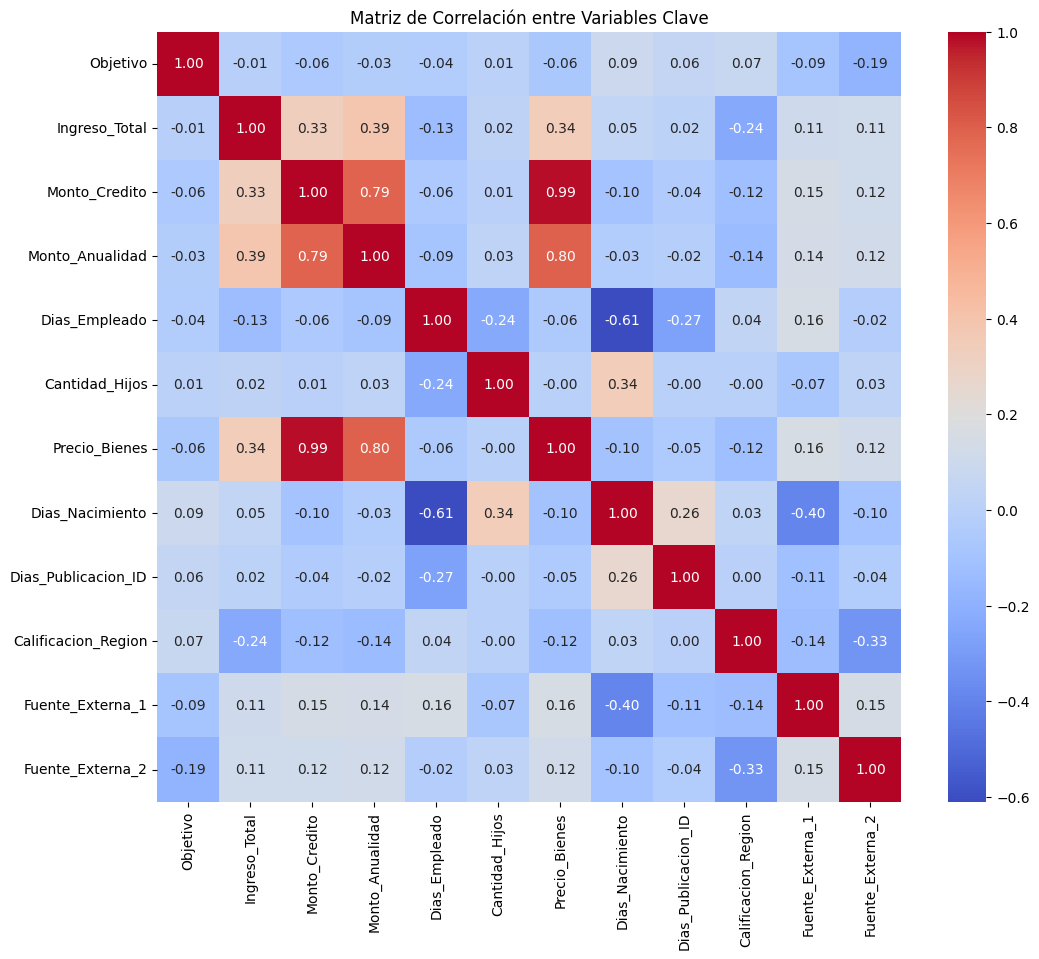

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box Plot de variables financieras clave
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_subconjunto[['Ingreso_Total', 'Monto_Credito', 'Monto_Anualidad']])
plt.title("Distribución de Ingreso Total, Monto de Crédito y Anualidad")
plt.xlabel("Variables Clave")
plt.ylabel("Valores")
plt.show()

# 2. Gráfico de Densidad para Ingreso y Monto de Crédito
plt.figure(figsize=(12, 6))
sns.kdeplot(df_subconjunto['Ingreso_Total'], label='Ingreso Total', fill=True)
sns.kdeplot(df_subconjunto['Monto_Credito'], label='Monto de Crédito', fill=True)
plt.title("Distribución de Ingreso Total y Monto de Crédito")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# 3. Diagrama de Dispersión entre Ingreso Total y Monto de Crédito
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ingreso_Total', y='Monto_Credito', data=df_subconjunto, hue='Objetivo', palette='coolwarm')
plt.title("Relación entre Ingreso Total y Monto de Crédito")
plt.xlabel("Ingreso Total")
plt.ylabel("Monto de Crédito")
plt.legend(title="Incumplimiento", loc='upper right')
plt.show()

# 4. Histograma de Días de Empleo
plt.figure(figsize=(10, 6))
sns.histplot(df_subconjunto['Dias_Empleado'].dropna(), kde=True)
plt.title("Distribución de Días de Empleo")
plt.xlabel("Días de Empleo")
plt.ylabel("Frecuencia")
plt.show()

# 5. Matriz de Correlación (solo columnas numéricas)
plt.figure(figsize=(12, 10))
numeric_columns = df_subconjunto.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Clave")
plt.show()


**1.Box Plot:**

Conclusión: Los ingresos y montos de crédito presentan valores atípicos altos, sugiriendo que algunos solicitantes tienen perfiles financieros distintos. Esto podría implicar menor riesgo en clientes con ingresos altos, aunque se requiere más análisis.                                                           
**2.Gráfico de Densidad:**

Conclusión: Las distribuciones de ingreso y monto de crédito sugieren que los solicitantes con ingresos altos también solicitan créditos mayores, lo que respalda la relación entre ambas variables.

**3.Diagrama de Dispersión:**

Conclusión: Aunque ingresos altos se asocian con créditos altos, el incumplimiento no parece concentrarse en un nivel específico de ingresos o crédito, indicando que otros factores también son relevantes.                                                                
**4.Histograma de Días de Empleo:**

Conclusión: La mayoría de los solicitantes tienen una antigüedad laboral moderada, con algunos valores extremos indicando estabilidad laboral. Esto podría correlacionarse con menor riesgo de incumplimiento.                                                                                                                       
**5.Matriz de Correlación:**

Conclusión: Hay correlaciones significativas, como entre Ingreso_Total y Monto_Credito, y también entre variables externas de riesgo e incumplimiento, lo que sugiere que estas son relevantes para la predicción del riesgo.

Formulación y Validación de Hipótesis                                                                              
Hipótesis 1: Los solicitantes con mayores ingresos tienen una menor probabilidad de incumplimiento del préstamo.

Validación: El análisis de ingresos mostró que aquellos con ingresos más altos tienden a solicitar montos de crédito mayores. Sin embargo, no se observó una disminución clara en el incumplimiento en función del nivel de ingresos, sugiriendo que los ingresos, aunque importantes, no son el único factor de riesgo.                                                                        
Hipótesis 2: Un historial laboral más largo se asocia con una menor probabilidad de incumplimiento.

Validación: La distribución de días de empleo indicó que aquellos con estabilidad laboral alta (días de empleo mayores) podrían tener un perfil financiero más estable. Sin embargo, el riesgo de incumplimiento no mostró una correlación evidente con la antigüedad en el empleo, lo que indica que el empleo puede influir en combinación con otros factores.                                                             
Hipótesis 3: Los solicitantes con montos de crédito más altos tienen mayor riesgo de incumplimiento.

Validación: Los gráficos de monto de crédito mostraron que los préstamos grandes tienden a estar distribuidos en una gama amplia de ingresos. Aunque hay algunos incumplimientos en niveles altos de crédito, la relación no es concluyente; este análisis sugiere que el monto de crédito por sí solo no es un predictor fuerte de incumplimiento.                                                               
Hipótesis 4: Las variables de riesgo externo (Fuente Externa) están correlacionadas con el incumplimiento del préstamo.

Validación: La matriz de correlación demostró que las fuentes externas tienen una relación leve con el Objetivo de incumplimiento, lo cual respalda parcialmente la hipótesis. Estas variables de riesgo externo pueden ser relevantes, aunque su impacto debe considerarse junto con otras variables.                                                                        
Conclusión General                                                              
Los resultados muestran que los factores financieros y laborales influyen en el perfil de riesgo, pero no son concluyentes de manera aislada. La inclusión de variables externas y un análisis multivariado más profundo ayudarán a construir un modelo predictivo más robusto para anticipar el incumplimiento de los solicitantes de préstamos.








**Segunda Entrega: Análisis en Profundidad y Recomendaciones**

Objetivo de la Segunda Entrega
**texto en negrita**
En esta etapa, profundizo en los factores que afectan el riesgo de incumplimiento en préstamos bancarios y busco formular recomendaciones que ayuden a optimizar las políticas de evaluación crediticia de la institución. Este análisis tiene como propósito identificar patrones en el comportamiento financiero y demográfico de los solicitantes para distinguir a aquellos con mayor probabilidad de pago puntual de aquellos que representan un mayor riesgo de incumplimiento.

**Contexto Comercial**
Como institución financiera, el banco se enfrenta a la necesidad de evaluar correctamente el riesgo al otorgar préstamos a clientes con distintos perfiles financieros. Una evaluación inexacta puede aumentar la tasa de incumplimiento y afectar la rentabilidad. A través de este análisis, pretendo identificar variables clave que permitan ajustar la evaluación de solicitudes de manera precisa, optimizando la toma de decisiones y minimizando el riesgo.

**Contexto Analítico**
Utilizando técnicas de análisis exploratorio y visualización de datos, profundizo en las relaciones entre las variables para detectar patrones significativos. Basándome en estos insights, formularé recomendaciones específicas y propondré enfoques predictivos, como modelos de clasificación, que podrían implementarse en el futuro para mejorar la precisión en la evaluación de préstamos.



**Recomendaciones Basadas en el Análisis Exploratorio**

1. Evaluar la influencia del ingreso total en las decisiones de préstamo

Recomendación: Priorizar los ingresos combinados de solicitantes y co-solicitantes en el análisis de aprobación de préstamos.

Justificación: Observé que los solicitantes con mayores ingresos totales tienden a solicitar montos de crédito más altos, lo que sugiere que el ingreso es un factor importante. Ingresos más altos, combinados con otras variables de riesgo, pueden ayudar a diferenciar entre perfiles de riesgo.

2. Incorporar la antigüedad en el empleo como una métrica de estabilidad
Recomendación: Incorporar la antigüedad laboral del solicitante como una métrica clave en la evaluación.

Justificación: La antigüedad laboral suele asociarse con estabilidad económica y menor riesgo de incumplimiento. Aquellos con una antigüedad significativa podrían considerarse menos riesgosos, especialmente en préstamos de mayor duración.

3. Considerar las puntuaciones externas de riesgo en la evaluación
Recomendación: Utilizar las variables de puntuación externa (Fuente_Externa_1, Fuente_Externa_2) para complementar la evaluación.

Justificación: Las puntuaciones externas no mostraron fuertes correlaciones individuales con el objetivo, pero su combinación con ingresos y antigüedad en el empleo podría mejorar la precisión en la evaluación de riesgo.

4. Ajustar el análisis de riesgo según el monto de crédito solicitado
Recomendación: Implementar políticas de evaluación diferenciadas para montos de crédito más altos.

Justificación: En el análisis del Monto_Credito, se observó que los préstamos más altos representan un riesgo potencial adicional. Se recomienda ajustar el análisis de riesgo para estos casos.

5. Revisión de políticas según estabilidad financiera y propiedad de bienes
Recomendación: Priorizar solicitantes con propiedad de bienes y antigüedad laboral.

Justificación: Aquellos con propiedad de bienes (Tiene_Propiedad) y estabilidad laboral presentan un menor riesgo. Podrían beneficiarse de mejores condiciones de préstamo.


**Propuesta de Modelo Predictivo Preliminar**

**Objetivo del Modelo**

El objetivo de este modelo es predecir la probabilidad de incumplimiento de un préstamo, permitiendo a la institución financiera mejorar su proceso de evaluación de riesgo y tomar decisiones informadas. Utilizando los datos del solicitante, el modelo podría asignar una puntuación de riesgo para cada nueva solicitud de préstamo.


**Tipo de Aprendizaje**

Dado que queremos predecir una variable de resultado binaria (incumplimiento o no incumplimiento), el modelo corresponde a una clasificación supervisada. En este contexto, la variable Objetivo indica el estado de pago del préstamo: un valor de 1 indica un incumplimiento, mientras que 0 indica cumplimiento.

**Algoritmo Propuesto**

Para este problema, algunos algoritmos de clasificación apropiados son:

Logistic Regression (Regresión Logística): Útil para entender la relación entre las variables predictoras y la probabilidad de incumplimiento.

Random Forest: Este algoritmo utiliza un conjunto de árboles de decisión, lo cual mejora la precisión y reduce el riesgo de sobreajuste.

Gradient Boosting: Algoritmo de clasificación avanzado que podría ser efectivo en la mejora de la precisión, pero con un tiempo de entrenamiento más prolongado.

**Variables Principales a Utilizar**

Las siguientes variables, analizadas en el EDA, se utilizarían como predictores clave:

Ingreso_Total: Refleja la capacidad de pago del solicitante.

Monto_Credito: Cantidad solicitada en el préstamo.

Monto_Anualidad: Cuota anual del préstamo.

Dias_Empleado: Antigüedad laboral, como indicador de estabilidad.

Dias_Nacimiento: Edad del solicitante, asociada con el riesgo de incumplimiento.

Fuente_Externa_1 y Fuente_Externa_2: Puntuaciones externas de riesgo.

Tiene_Propiedad y Tiene_Auto: Indicadores de propiedad de bienes.

Evaluación del Modelo **texto en negrita**

Para evaluar el rendimiento del modelo, se utilizarían métricas como:

Precisión (Accuracy): Para medir el porcentaje de clasificaciones correctas.
Recall: Para asegurar que los casos de incumplimiento se identifiquen correctamente.
ROC-AUC: Permitiría observar la capacidad del modelo para diferenciar entre incumplimiento y no incumplimiento.


Para este proyecto, el modelo más adecuado para una implementación preliminar sería** Random Forest**, por varias razones:

Robustez ante Variables No Lineales: Random Forest maneja bien relaciones complejas entre variables, que pueden ser no lineales, como las que encontramos entre ingreso, antigüedad laboral y riesgo de incumplimiento.

Reducción de Sobreajuste: Al usar múltiples árboles de decisión y promediar los resultados, Random Forest reduce el riesgo de sobreajuste, lo cual es útil para datos financieros que pueden presentar variabilidad.

Interpretabilidad de Variables Importantes: Una ventaja clave es que Random Forest permite obtener una medida de la importancia de cada variable en la predicción, lo cual nos ayudaría a entender mejor cuáles características son más relevantes para el riesgo de incumplimiento.

**Conclusión: Elección del Modelo**
En base a estos puntos, Random Forest sería nuestra elección preliminar para un modelo predictivo, dado que ofrece un balance entre precisión, capacidad para manejar variables complejas, y la posibilidad de interpretar los factores de riesgo en el contexto de préstamos.